In [1]:
import cv2
import numpy as np
import mediapipe as mp
from matplotlib import pyplot as plt

In [2]:
# 初始化Mediapipe Objectron模型
mp_drawing = mp.solutions.drawing_utils
mp_objectron = mp.solutions.objectron

In [3]:
# 選擇要檢測的物體類型
objectron = mp_objectron.Objectron(static_image_mode=True,
                                   max_num_objects=5,
                                   min_detection_confidence=0.5,
                                   min_tracking_confidence=0.5,
                                   model_name='Chair')  # 'Shoe', 'Chair', 'Cup', or 'Camera'

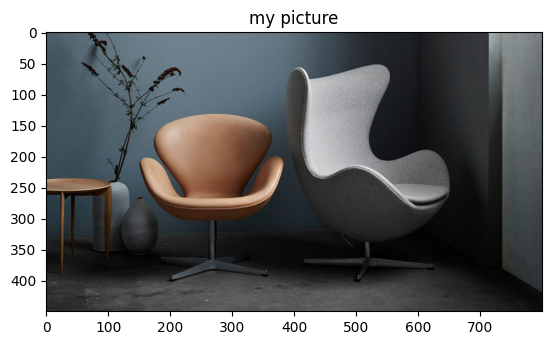

In [68]:
image_path = "Chairs.jpg"
image = cv2.imread(image_path)

# 檢查是否成功讀取圖片
if image is None:
    raise FileNotFoundError(f"Image at {image_path} not found.")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('my picture')
plt.show()

In [69]:
# 將BGR圖像轉換為RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 檢測物體並估計3D姿態
results = objectron.process(image_rgb)


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [70]:
if results.detected_objects:
    for i, detected_object in enumerate(results.detected_objects):
        print(f"Object {i+1}:")
        #print(f"  - Label: {detected_object.label}")
        #print(f"  - Score: {detected_object.score}")
        print(f"  - Landmarks 2D: {detected_object.landmarks_2d.landmark}")
        #print(f"  - Landmarks 3D: {detected_object.landmarks_3d.landmark}")
        #print(f"  - Rotation: {detected_object.rotation}")
        #print(f"  - Translation: {detected_object.translation}")
        print()

Object 1:
  - Landmarks 2D: [x: 0.653063118
y: 0.446355313
, x: 0.48527056
y: 0.601641893
, x: 0.593411446
y: 0.86756283
, x: 0.489981294
y: 0.128383577
, x: 0.631427288
y: 0.318534374
, x: 0.660938382
y: 0.529407322
, x: 0.800371587
y: 0.732946098
, x: 0.694697618
y: 0.109473228
, x: 0.8868801
y: 0.251657039
]

Object 2:
  - Landmarks 2D: [x: 0.337741643
y: 0.529355168
, x: 0.223489955
y: 0.642334342
, x: 0.199538529
y: 0.843658686
, x: 0.212819219
y: 0.275475144
, x: 0.193060204
y: 0.40927574
, x: 0.44317919
y: 0.620494783
, x: 0.477844357
y: 0.819442809
, x: 0.457392454
y: 0.247922
, x: 0.50183
y: 0.379457474
]



In [71]:
i=1
# 繪製檢測到的物體及其3D姿態
if results.detected_objects:
    for i, detected_object in enumerate(results.detected_objects):
        # 繪製3D邊界框
        mp_drawing.draw_landmarks(
            image, detected_object.landmarks_2d, mp_objectron.BOX_CONNECTIONS)
        mp_drawing.draw_axis(image, detected_object.rotation, detected_object.translation)

        # 計算長、寬、高
        landmarks_3d = detected_object.landmarks_3d.landmark
        x_coords = [landmark.x for landmark in landmarks_3d]
        y_coords = [landmark.y for landmark in landmarks_3d]
        z_coords = [landmark.z for landmark in landmarks_3d]

        length = max(x_coords) - min(x_coords)
        width = max(y_coords) - min(y_coords)
        height = max(z_coords) - min(z_coords)
        
        bbox_center = np.mean([[landmark.x, landmark.y, landmark.z] for landmark in landmarks_3d], axis=0)
        cv2.putText(image, f'obj {i}', (200*i, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        print(f'obj {i}:')
        print(f'L: {length:.2f}')
        print(f'W: {width:.2f}')
        print(f'H: {height:.2f}')

        i = i + 1


obj 0:
L: 0.31
W: 0.70
H: 0.30
obj 1:
L: 0.32
W: 0.58
H: 0.16


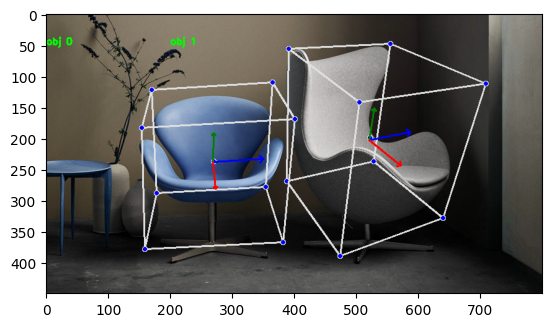

In [72]:
plt.imshow(image)
plt.show()